# Logistic Regression

# Bank Personal Loan prediction Model using Logistic Regression

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd C:\Users\narkh\Downloads\Datasets\Logistic regression

C:\Users\narkh\Downloads\Datasets\Logistic regression


In [3]:
bank = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
Y = bank['Personal Loan']

In [6]:
X = bank[['Age' , 'Experience' , 'Income' , 'Family' , 'CCAvg' , 'Education' , 'Mortgage' , 'Securities Account' , 'CD Account' , 'Online' , 'CreditCard']]

In [7]:
import statsmodels.api as sm

In [8]:
x1 = sm.add_constant(X)

In [9]:
logistic = sm.Logit(Y , x1)

In [10]:
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        11:16:17   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

Income , Family , CCAvg , Education , Securities Account , CD Account , Online , Credit card features significantly affect the Dependent variable

## Building and Training the model 

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 0)

In [23]:
X_train.shape

(3750, 11)

In [24]:
X_test.shape

(1250, 11)

In [25]:
y_train.shape

(3750,)

In [26]:
y_test.shape

(1250,)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()

In [30]:
log_reg.fit(X_train,y_train)

C:\Users\narkh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1131,   11],
       [  45,   63]], dtype=int64)

In [53]:
a = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the model is " , a*100,"%")


Accuracy of the model is  95.52000000000001 %


Text(0.5, 15.0, 'Predicted label')

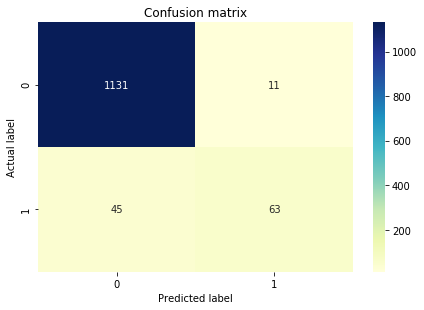

In [48]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Prediction for unseen Data 

In [49]:
testing = log_reg.predict(np.array([[28 , 6 , 170 , 5 , 7.9 , 5 , 100 , 0 , 0 , 0 , 0]]))
print("Result: " , testing)
if testing == 1:
    print("Loan can be Granted")
else:
    print("Loan cannot be granted")

Result:  [1]
Loan can be Granted
